In [1]:
import time
from selenium import webdriver
from selenium.webdriver import Chrome 
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import string
import pandas as pd
import numpy as np
import re
import nltk
import unicodedata as ud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from nltk import word_tokenize 
from nltk.util import ngrams
import multiprocessing
import contractions
from pywsd.utils import lemmatize_sentence
from textblob import TextBlob
from collections import Counter
from gensim.models.phrases import Phrases, Phraser
import gensim
from gensim.models import Word2Vec
import pickle as pkl
from sklearn.cluster import KMeans

C:\Users\10692373\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\10692373\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\10692373\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Warming up PyWSD (takes ~10 secs)... took 3.986077308654785 secs.


In [2]:
#paths=["https://www.youtube.com/watch?v=nK-yJD_fAtk",
#      "https://www.youtube.com/watch?v=okOKusIIqVU",
#      "https://www.youtube.com/watch?v=mKR9lUCBE4A",
#      "https://www.youtube.com/watch?v=ksrhY8pOAKQ",
#      "https://www.youtube.com/watch?v=6re4FItgg_4",
#      "https://www.youtube.com/watch?v=u2a1_VBcS3A&list=PLzGHKb8i9vTysN3rq_6QHJz2LPw7KvvAM&index=4",
#      "https://www.youtube.com/watch?v=eYPbk9RaRyo",
#      "https://www.youtube.com/watch?v=_HO0LGZpqwY",
#      'https://www.youtube.com/watch?v=XRH0uR3ply4',
#      "https://www.youtube.com/watch?v=qD6jX1QlB_E",
#      "https://www.youtube.com/watch?v=Xh0w57UJqeA&list=PLPszygYHA9K0iPrCtEREEJI9KIvMFrYAS&index=24",
#      "https://www.youtube.com/watch?v=Xh0w57UJqeA&list=PLPszygYHA9K0iPrCtEREEJI9KIvMFrYAS&index=24"]

# Scraping YT comments using Selenium

In [3]:
#def ScrapComments(path):
#    authors = []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
#    try:
#        # Configuring the ChromeDriver
#        options = webdriver.ChromeOptions()
#        options.add_argument('-headless')
#        #options.add_argument('-no-sandbox')
#        #options.add_argument('-disable-dev-shm-usage')
#        #wd = webdriver.Chrome('chromedriver',chrome_options=options)
#        driver =webdriver.Chrome(r'chromedriver_win32/chromedriver',chrome_options=options)
#        wait = WebDriverWait(driver,15)
#        driver.get(path)
#
#        for item in range(20):
#            wait.until(EC.visibility_of_element_located((By.TAG_NAME,"body"))).send_keys(Keys.END)
#            time.sleep(15)
#
#    # Scrapping all the comments and their author
#        for author in wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"style-scope ytd-comment-renderer"))):
#            authors.append(author.text)
#
#    except Exception as e:
#        print(e)
#    return authors

In [4]:
#count=0

In [5]:
#%%time
#for i in paths:
#    if count==0:
#        data = ScrapComments(paths[0])
#        print(0)
#        df=pd.DataFrame(data)
#    if count==1:
#        data1 = ScrapComments(paths[1])
#        print(1)
#        df1=pd.DataFrame(data1)
#    if count==2:
#        data2 = ScrapComments(paths[2])
#        print(2)
#        df2=pd.DataFrame(data2)
#    if count==3:
#        data3 = ScrapComments(paths[3])
#        print(3)
#        df3=pd.DataFrame(data3)
#    if count==4:
#        data4 = ScrapComments(paths[4])
#        print(4)
#        df4=pd.DataFrame(data4)
#    if count==5:
#        data5 = ScrapComments(paths[5])
#        print(5)
#        df5=pd.DataFrame(data5)
#    if count==6:
#        data6 = ScrapComments(paths[6])
#        print(6)
#        df6=pd.DataFrame(data6)
#    if count==7:
#        data7 = ScrapComments(paths[7])
#        print(7)
#        df7=pd.DataFrame(data7)
#    if count==8:
#        data8 = ScrapComments(paths[8])
#        print(8)
#        df8=pd.DataFrame(data8)
#    if count==9:
#        data9 = ScrapComments(paths[9])
#        print(9)
#        df9=pd.DataFrame(data9)
#    if count==10:
#        data10 = ScrapComments(paths[10])
#        print(10)
#        df10=pd.DataFrame(data10)
#    if count==11:
#        data11 = ScrapComments(paths[11])
#        print(11)
#        df11=pd.DataFrame(data11)
#    count=count+1

# Creating a Dataframe of comments

In [6]:
#final_df=pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11],axis=0)

In [7]:
#final_df.shape

In [8]:
#final_df.head(20)

In [9]:
#final_df.to_csv('yt_comments.csv')

In [10]:
df=pd.read_csv('yt_comments.csv')

# Data Cleaning

In [11]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [12]:
df['Comments']=df['Comments'].str.lower()
df['Comments']=df['Comments'].str.replace(","," ")
df['Comments']=df['Comments'].str.replace("\n",",")

In [13]:
def add_user(text):
    text1=re.split(',',text,maxsplit=1)
    return text1[0]

In [14]:
df['Username']=df['Comments'].apply(lambda x: add_user(x))

In [15]:
def clean_texts(text):
    text=re.sub(',[0-9]*,reply','',text)
    pat=re.compile(r'[0-9]+ (days|weeks|months|years|week|month|year|hours|hour|day|minutes|minute) ago',re.IGNORECASE)
    text1=re.sub(pat,'',text)
    text2=re.split(',',text1,maxsplit=1)
    text3=text2[1:]
    text4=str(text3)
    text4=text4.replace(","," ")
    text5=text4.replace("'","")
    text6=text5.replace('"',"")
    return text6

In [16]:
df['clean_text']=df['Comments'].apply(lambda x: clean_texts(x))

In [17]:
df['clean_text']=df['clean_text'].str.replace('/',' ')
df['clean_text']=df['clean_text'].str.replace('-',' ')

In [18]:
check = Speller(lang='en', fast=True, only_replacements=True)
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(check(i) for i in x.split()))

In [19]:
stopword = nltk.corpus.stopwords.words('english')
lem=WordNetLemmatizer()
new_stopwords = ["said","reply", "that's", "im", "put","bout", "video", "blinkin","blinken", "wion","wion's","wions", "dw", "bbcnews", "bbc",
                "dwnews","u", "r", "k", "gr8", "nyc", "nd", "nemzetkozi", "blah", "sharma", "indiatoday", "france24", "upadhyay", "martin", "palki",
                "rthk"]

stopword.extend(new_stopwords)

In [20]:
lst = ['against','no','nor','not',"don't","couldn't","didn't","doesn't","hadn't","hasn't","haven't",
        "isn't","mustn't","needn't", "shouldn't","wasn't","weren't","won't","wouldn't","aren't",
      'ain', 'aren','couldn','didn', 'doesn', 'hadn', 'hasn', 'haven','isn','mightn', "mightn't",
      'mustn','needn','shan', "shan't", 'shouldn', 'wasn', 'weren', 'won', 'wouldn']

for i in lst:
    stopword.remove(i)

In [21]:
def deep_cleaning(doc):
    doc=doc.lower()
    doc = doc.replace("/", " ")
    doc = doc.replace("-", " ")
    doc = doc.replace(".", " ")
    test_str = doc.translate(str.maketrans('', '', string.punctuation))
    test_str = ' '.join(test_str.split())
    test_str=re.findall(r'[a-zA-Z]+',test_str)
    #test_str = [word for word in test_str if len(word) > 1]
    test_str=[word for word in test_str if word not in stopword]
    #test_str=[lem.lemmatize(word) for word in test_str]
    test_str=' '.join(test_str)
    return test_str

In [22]:
df['clean_text']=df['clean_text'].apply(lambda x: deep_cleaning(x))
df['clean_text']=df['clean_text'].apply(lambda x: " ".join(lemmatize_sentence(x)))

In [23]:
df[df['clean_text'].str.split().str.len() > 1]

,Comments,Username,clean_text
0,"bo hodiak,8 days ago,i am a ukrainian-american...",bo hodiak,ukrainian american fluent ukrainian retired jo...
1,"jay cosgrove,21 hours ago,talk about giving it...",jay cosgrove,talk give nutshell brilliant try get straight ...
2,"meena meena,1 day ago,thank you so very much f...",meena meena,thank much provide extremely comprehensive min...
3,"pooja ketaruth,1 day ago,palki sharma and the ...",pooja ketaruth,whole lion team brilliant content kudos guys w...
4,"toti magalogo,3 days ago,great explanation of ...",toti magalogo,great explanation history clear not russian no...
...,...,...,...
3202,"senthil kumar,2 days ago,india stands with rus...",senthil kumar,india stand russia
3203,"jack whelan,1 day ago,who else using a brazili...",jack whelan,els use brazilian vpn watch
3204,"vimukthi,2 days ago,wthk i suppose to believe ...",vimukthi,suppose believe dont trust news still watch
3206,"cakudaw2021,3 days ago,stop war!....i love rus...",cakudaw2021,stop war love russia putin please stop war


In [24]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Error loading words: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [25]:
def lang_detect(text):
    text1 = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text1

In [26]:
df['clean_text']=df['clean_text'].apply(lambda x: lang_detect(x))
df.drop(columns=['Comments'],inplace=True, axis=1)
df=df.drop_duplicates()
df=df[df['clean_text'].map(len)>1]

In [27]:
df.shape

(2732, 2)

In [28]:
df.groupby(['Username'])['clean_text'].count().sort_values(ascending=False)

Username
golden eagle- mexican eagle    7
vijay shetty                   4
vanessa weems ss               4
james ewanchook                3
jessica printke                3
                              ..
hanoiboy                       1
hanoo ina ally                 1
hansa kothari                  1
hansen peter                   1
👑the duchess👑                  1
Name: clean_text, Length: 2613, dtype: int64

In [39]:
df.to_csv('cleaned_text.csv',index=False)

In [34]:
text=df['clean_text'].astype(str)
text=' '.join(text)

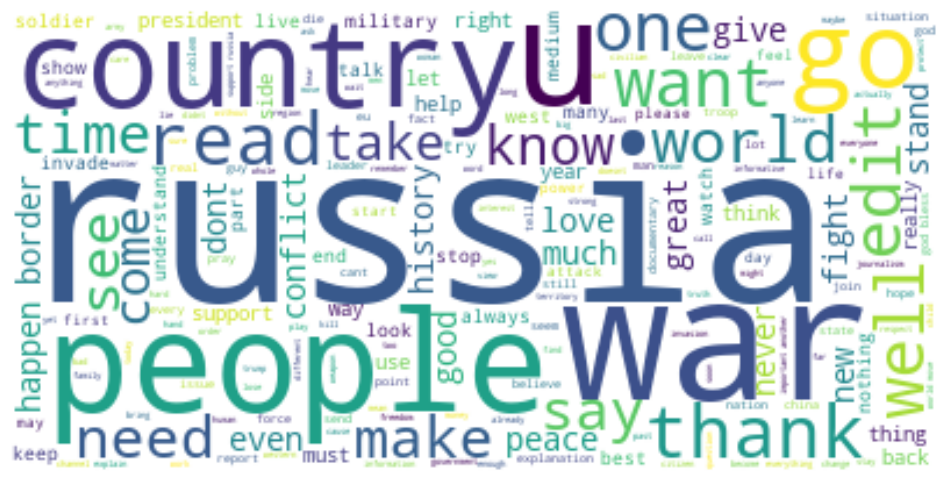

In [35]:
word_cloud = WordCloud(collocations = True, max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
s=df['clean_text'].str.split()
phrases = Phrases(s, min_count=5, progress_per=10000, threshold=10)
bigram = Phraser(phrases)
sentences = bigram[s]
sentences[6]

['blow',
 'away',
 'clear',
 'accurate',
 'explanation',
 'motherland',
 'thank_much']

In [37]:
new_df=df.copy()
new_df['bigrams_inc']=sentences
new_df['bigrams_inc']=new_df['bigrams_inc'].str.join(' ')
#new_df['bigrams_inc']=new_df['bigrams_inc'].apply(lambda x: ''.join(bigram[x]))

In [38]:
new_df.to_csv('sample_dataset.csv',index=False)